# Homework #1
## In this homework you are going to get familiar with basics of NetworkX and Gephi for analysing and visualizing networks.

## Task 1
### NetworkX is a Python library for the analysis of networks. With NetworkX you can create, import, manipulate graphs. Additionally, you can calculate basic properties of these graphs with its built in functions. Unfortunately, NetworkX is not have very powerful for visualizing large graphs which we are going to work with most of the time. For this reason, we are going to use a software called Gephi. In this homework, you are going to do some basic analysis on some famous graphs which you download using the following codes and then store the results in a format which is readable by Gephi. You then use Gephi to have a meaningful visualization of these results.  

### You can download Gephi from the following web page:
### https://gephi.org/users/download

###  You can also learn the basics of NetworkX library and Gephi by looking at the following pages:
### Some useful links to get familiar with NetworkX:
### https://vimeo.com/124354692
### https://www.cl.cam.ac.uk/~cm542/teaching/2010/stna-pdfs/stna-lecture8.pdf
### Some useful links to get familiar with Gephi:
### https://gephi.org/users/tutorial-visualization/
### https://www.youtube.com/watch?v=FLiv3xnEepw

### Run the following cell to import the libraries that we are going to use in this homework:

In [2]:
%%time
#import useful packages, all of them are important but not necessarily used in this code
#enable inline plotting in Python Notebook
#supress warnings

%pylab inline
import networkx as nx
import numpy as np
import matplotlib
import scipy
import warnings
warnings.filterwarnings('ignore')
import time

Populating the interactive namespace from numpy and matplotlib
CPU times: user 2.68 s, sys: 420 ms, total: 3.1 s
Wall time: 3.27 s


### Run the following cell to download the raw data for the networks we are going to work with:

In [2]:
%%time
# creat the directory at first
import os, errno
try:
    os.makedirs("data")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
try:
    os.makedirs("data/facebook")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
        
try:
    os.makedirs("data/enron")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
try:
    os.makedirs("data/citNet")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

try:
    os.makedirs("data")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

# download the network file
import urllib
urllib.urlretrieve("https://files.oakland.edu/users/grossman/enp/Erdos1.html", "data/Erdos1.html")
urllib.urlretrieve("http://snap.stanford.edu/data/cit-HepTh.txt.gz", "data/citNet/cit-HepTh.txt.gz")
urllib.urlretrieve("http://snap.stanford.edu/data/cit-HepTh-dates.txt.gz", "data/citNet/cit-HepTh-dates.txt.gz")
urllib.urlretrieve("http://snap.stanford.edu/data/cit-HepTh-abstracts.tar.gz", "data/citNet/cit-HepTh-abstracts.tar.gz")
urllib.urlretrieve("https://snap.stanford.edu/data/facebook_combined.txt.gz","data/facebook/facebook_combined.txt.gz")
urllib.urlretrieve("https://snap.stanford.edu/data/email-Enron.txt.gz","data/enron/email-Enron.txt.gz")

CPU times: user 76 ms, sys: 60 ms, total: 136 ms
Wall time: 4.15 s


### Run the following cell to unzip and store the Facebook dateset in a .txt file which is readable by NetworkX:

In [2]:
%%time
# The following code simply converts the data file from ZIP to TXT so that NetworkX can read it

import gzip
inF = gzip.GzipFile("data/facebook/facebook_combined.txt.gz", 'rb')
s = inF.read()
inF.close()

outF = file("data/facebook/facebook_combined.txt", 'wb')
outF.write(s)
outF.close()

No. of nodes are= 4039
No. of edges are= 88234
CPU times: user 492 ms, sys: 20 ms, total: 512 ms
Wall time: 680 ms


In [14]:
%%time
#load the network after converting into text file

file_name="data/facebook/facebook_combined.txt"

#convert the information in the text file into a graph, find no. of edges & nodes in the graph

g1=nx.read_edgelist(file_name,create_using=nx.Graph(),nodetype=int)
node, edge=g1.order(),g1.size()
print "No. of nodes are=",node
print "No. of edges are=",edge

No. of nodes are= 4039
No. of edges are= 88234
CPU times: user 476 ms, sys: 16 ms, total: 492 ms
Wall time: 522 ms


In [7]:
try:
    os.makedirs("Results/facebook")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
        
try:
    os.makedirs("Results/enron")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

In [30]:
import os,errno
try:
    os.makedirs("Results/citation")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
        
try:
    os.makedirs("Results/erdos")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

### Write a code that plots the degree distribution of the above graph. (Make sure you do not confuse degree distribution with degree sequence!)

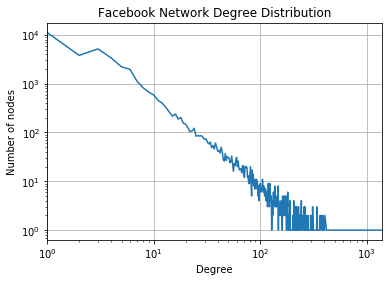

Writing 'degList' (dict) to file 'Results/facebook/degDist.txt'.
Average degree= 10.0202223918
CPU times: user 9.95 s, sys: 240 ms, total: 10.2 s
Wall time: 27.5 s


In [8]:
%%time
deg=g1.degree()
d=list(np.zeros((node), dtype=np.int))
temp=list(np.zeros((node), dtype=np.int))
for k in range (node):
    d[k]= deg[k]
for k in range (node):
    temp[k]=k
degList=dict(zip(temp,d))
for k in g1.nodes():
    g1.node[k]['deg'] = degList[k]
deg_values = sorted(set(degList.values()))
deg_hist = [degList.values().count(x) for x in deg_values]
plt.figure()
plt.grid(True)
plt.loglog(deg_values, deg_hist) #degree
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Facebook Network Degree Distribution')
plt.xlim([0, max(degList.values())])
plt.show()
plt.close()
%store degList >Results/facebook/degDist.txt
print "Average degree=",mean(degList.values())

### Write a code that calculates and prints the network diameter and the average shortest path.

In [13]:
%%time
#network diameter and average shortest path length
connected=nx.is_connected(g1)
if connected is True:
    diameter=nx.diameter(g1)
    print "Network diameter=",diameter
    aspl=nx.average_shortest_path_length(g1)
    print "Average Shortest path length=",aspl
%store diameter >Results/facebook/diameter.txt
%store aspl >Results/facebook/aspl.txt

Network diameter= 8
Average Shortest path length= 3.6925068497
Writing 'diameter' (int) to file 'Results/facebook/diameter.txt'.
Writing 'aspl' (float) to file 'Results/facebook/aspl.txt'.
CPU times: user 9min 45s, sys: 2.06 s, total: 9min 47s
Wall time: 9min 42s


### Write a code to calculate the clustering coeffient of the nodes of the graph and plot it.

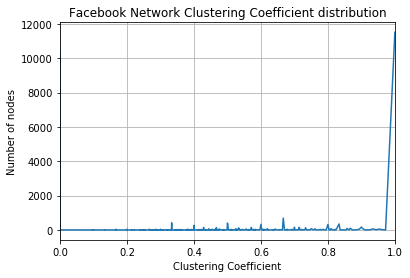

Average Clusterng Coefficient= 0.509189901972
Writing 'cc' (dict) to file 'Results/facebook/clCoeff.txt'.
CPU times: user 11.2 s, sys: 372 ms, total: 11.5 s
Wall time: 11.2 s


In [24]:
%%time
#clustering coefficient

cc=nx.clustering(g1)
cc_values = sorted(set(cc.values()))
cc_hist = [cc.values().count(x) for x in cc_values]
plt.figure()
plt.grid(True)
plt.plot(cc_values, cc_hist)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of nodes')
plt.title('Facebook Network Clustering Coefficient distribution')
plt.xlim([0, 1])
plt.show()
plt.close()
print "Average Clusterng Coefficient=",mean(cc.values())
%store cc >Results/facebook/clCoeff.txt

### Write a code to calculate the degree centrality of the nodes of the graph and plot it.

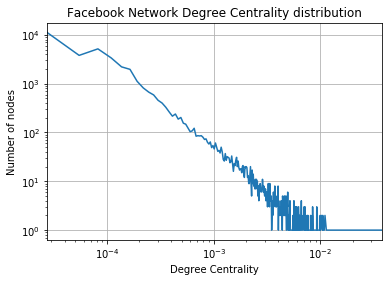

Average degree centrality= 0.000273097555035
Writing 'dc' (dict) to file 'Results/facebook/degCen.txt'.
CPU times: user 12.1 s, sys: 400 ms, total: 12.5 s
Wall time: 28.3 s


In [7]:
%%time
#degree centrality distribution and parsing into Gephi

dc=nx.degree_centrality(g1)
for k in g1.nodes():
    g1.node[k]['dc'] = dc[k]
dc_values = sorted(set(dc.values()))
dc_hist = [dc.values().count(x) for x in dc_values]
plt.figure()
plt.grid(True)
plt.loglog(dc_values, dc_hist)
plt.xlabel('Degree Centrality')
plt.ylabel('Number of nodes')
plt.title('Facebook Network Degree Centrality distribution')
plt.xlim([0, max(dc.values())])
plt.show()
plt.close()
print "Average degree centrality=",mean(dc.values())
%store dc >Results/facebook/degCen.txt

### Write a code to calculate the betweenness centrality of the nodes of the graph and plot it.

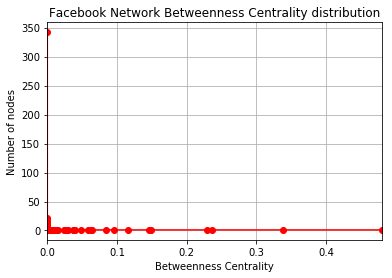

Average betweenness centrality= 0.000666957356873
Writing 'bcen' (dict) to file 'Results/facebook/betCen.txt'.
CPU times: user 2min 56s, sys: 360 ms, total: 2min 56s
Wall time: 2min 56s


In [16]:
%%time
#Betweenness centrality distribution and parsing into Gephi

bcen=nx.betweenness_centrality(g1)
for k in g1.nodes():
    g1.node[k]['bcen'] = bcen[k]
bcen_values = sorted(set(bcen.values()))
bcen_hist = [bcen.values().count(x) for x in bcen_values]
plt.figure()
plt.grid(True)
plt.plot(bcen_values, bcen_hist, 'ro-')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Number of nodes')
plt.title('Facebook Network Betweenness Centrality distribution')
plt.xlim([0, max(bcen.values())])
plt.show()
plt.close()
print "Average betweenness centrality=",mean(bcen.values())
%store bcen >Results/facebook/betCen.txt

### Write a code to calculate the eigenvector centrality of the nodes of the graph and plot it.

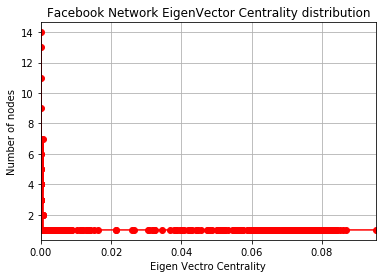

Average Eigen vector centrality= 0.00386434080793
Writing 'ecen' (dict) to file 'Results/facebook/eigenCen.txt'.
CPU times: user 11.6 s, sys: 372 ms, total: 12 s
Wall time: 11.6 s


In [17]:
%%time
#Eigen Vector centrality distribution

ecen=nx.eigenvector_centrality(g1)
ecen_values = sorted(set(ecen.values()))
ecen_hist = [ecen.values().count(x) for x in ecen_values]
plt.figure()
plt.grid(True)
plt.plot(ecen_values, ecen_hist,'ro-')
plt.xlabel('Eigen Vectro Centrality')
plt.ylabel('Number of nodes')
plt.title('Facebook Network EigenVector Centrality distribution')
plt.xlim([0, max(ecen.values())])
plt.show()
plt.close()
print "Average Eigen vector centrality=",mean(ecen.values())
%store ecen >Results/facebook/eigenCen.txt

### Write a code to store the graph in a file that is readable by Gephi (Hint: Use NetworkX write_gml method.) Make sure to add the betweenness centrality and degree of each node as an attribute of each node to be stored in this file for the next task.

In [18]:
%%time
#create .gml object with attributes for 'Gephi' visualization

nx.write_gml(g1, "data/facebook/g1.gml")

CPU times: user 524 ms, sys: 0 ns, total: 524 ms
Wall time: 718 ms


## Enron email network analysis

In [2]:
%%time
# The following code simply converts the data file from ZIP to TXT so that NetworkX can read it

import gzip
inF = gzip.GzipFile("data/enron/email-Enron.txt.gz", 'rb')
s = inF.read()
inF.close()

outF = file("data/enron/email-Enron.txt", 'wb')
outF.write(s)
outF.close()

CPU times: user 48 ms, sys: 4 ms, total: 52 ms
Wall time: 250 ms


In [3]:
%%time
#load the network after converting into text file

file_name="data/enron/email-Enron.txt"

#convert the information in the text file into a graph, find no. of edges & nodes in the graph

g1=nx.read_edgelist(file_name,create_using=nx.Graph(),nodetype=int)
node, edge=g1.order(),g1.size()
print "No. of nodes are=",node
print "No. of edges are=",edge

No. of nodes are= 36692
No. of edges are= 183831
CPU times: user 2.03 s, sys: 88 ms, total: 2.12 s
Wall time: 2.12 s


In [4]:
%%time
# check whether the network is connected, if not find the largest connected component of the network
connected=nx.is_connected(g1)
og=g1

if connected is True:
    print "Graph is connected!"
    graph_max=g1
else:
    print "Graph is not connected. So, finding the largest connected component of graph"
    print "Properties of largest subgraph:"
    graphs = list(nx.connected_component_subgraphs(g1, copy=True))
    # the connected component with the most nodes
    graph_max = sorted([(len(gn.nodes()), gn) for gn in graphs], key=lambda x: x[0], reverse=True)[0][1]
    print nx.info(graph_max)
g1=graph_max

Graph is not connected. So, finding the largest connected component of graph
Properties of largest subgraph:
Name: 
Type: Graph
Number of nodes: 33696
Number of edges: 180811
Average degree:  10.7319
CPU times: user 28 s, sys: 72 ms, total: 28 s
Wall time: 27.9 s


In [30]:
%%time
#average shortest path length of Largest connected component
aspl=nx.average_shortest_path_length(g1)
print "Average Shortest path length=",aspl
#%store diameter >Results/enron/diameter.txt
%store aspl >Results/enron/aspl.txt

Average Shortest path length= 4.02516398818
Writing 'aspl' (float) to file 'Results/enron/aspl.txt'.
CPU times: user 2h 7min 10s, sys: 2min 28s, total: 2h 9min 38s
Wall time: 2h 8min 6s


In [7]:
%%time
diameter=nx.diameter(g1)
print "Network diameter=",diameter
%store diameter >Results/enron/diameter.txt

Network diameter= 13
Writing 'diameter' (int) to file 'Results/enron/diameter.txt'.
CPU times: user 2h 9min 36s, sys: 34.3 s, total: 2h 10min 10s
Wall time: 2h 8min 46s


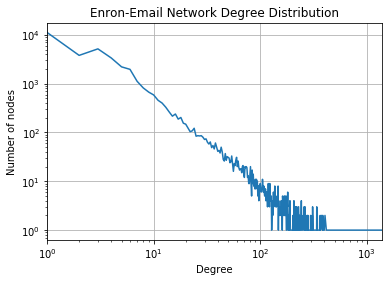

Writing 'deg' (DegreeView) to file 'Results/enron/degDist.txt'.
Average degree= 10.0202223918


In [5]:

deg=og.degree()
d=list(np.zeros((node), dtype=np.int))
temp=list(np.zeros((node), dtype=np.int))
for k in range (node):
    d[k]= deg[k]
for k in range (node):
    temp[k]=k
degList=dict(zip(temp,d))
for k in g1.nodes():
    og.node[k]['deg'] = deg[k]
deg_values = sorted(set(degList.values()))
deg_hist = [degList.values().count(x) for x in deg_values]
plt.figure()
plt.grid(True)
plt.loglog(deg_values, deg_hist) #degree
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Enron-Email Network Degree Distribution')
plt.xlim([0, max(degList.values())])
plt.show()
plt.close()
%store deg >Results/enron/degDist.txt
print "Average degree=",mean(degList.values())

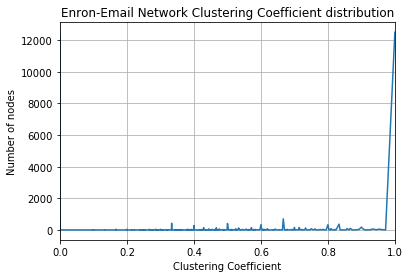

Average Clusterng Coefficient= 0.4969825596
Writing 'cc' (dict) to file 'Results/enron/clCoeff.txt'.
CPU times: user 12.8 s, sys: 472 ms, total: 13.3 s
Wall time: 12.9 s


In [4]:
%%time
#clustering coefficient

cc=nx.clustering(og)
cc_values = sorted(set(cc.values()))
cc_hist = [cc.values().count(x) for x in cc_values]
plt.figure()
plt.grid(True)
plt.plot(cc_values, cc_hist)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of nodes')
plt.title('Enron-Email Network Clustering Coefficient distribution')
plt.xlim([0, 1])
plt.show()
plt.close()
print "Average Clusterng Coefficient=",mean(cc.values())
%store cc >Results/enron/clCoeff.txt

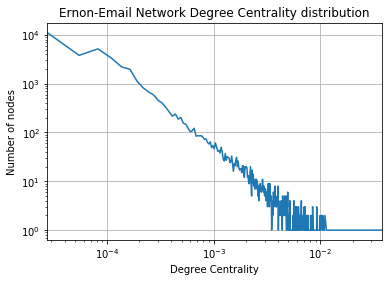

Average degree centrality= 0.000273097555035
Writing 'dc' (dict) to file 'Results/enron/degCen.txt'.
CPU times: user 2.24 s, sys: 460 ms, total: 2.7 s
Wall time: 2.32 s


In [5]:
%%time
#degree centrality distribution and parsing into Gephi

dc=nx.degree_centrality(og)
for k in og.nodes():
    og.node[k]['dc'] = dc[k]
dc_values = sorted(set(dc.values()))
dc_hist = [dc.values().count(x) for x in dc_values]
plt.figure()
plt.grid(True)
plt.loglog(dc_values, dc_hist)
plt.xlabel('Degree Centrality')
plt.ylabel('Number of nodes')
plt.title('Ernon-Email Network Degree Centrality distribution')
plt.xlim([0, max(dc.values())])
plt.show()
plt.close()
print "Average degree centrality=",mean(dc.values())
%store dc >Results/enron/degCen.txt

In [4]:
%%time
from multiprocessing import Pool
import time
import itertools

G=g1

def chunks(l, n):
    """Divide a list of nodes `l` in `n` chunks"""
    l_c = iter(l)
    while 1:
        x = tuple(itertools.islice(l_c, n))
        if not x:
            return
        yield x


def _betmap(G_normalized_weight_sources_tuple):
    """Pool for multiprocess only accepts functions with one argument.
    This function uses a tuple as its only argument. We use a named tuple for
    python 3 compatibility, and then unpack it when we send it to
    `betweenness_centrality_source`
    """
    return nx.betweenness_centrality_subset(*G_normalized_weight_sources_tuple)


def betweenness_centrality_parallel(G, processes=4):
    """Parallel betweenness centrality  function"""
    p = Pool(processes=processes)
    node_divisor = len(p._pool)*4
    node_chunks = list(chunks(G.nodes(), int(G.order()/node_divisor)))
    #print node_chunks
    num_chunks = len(node_chunks)

    
    bt_sc = p.map(_betmap,
                  zip([G]*num_chunks,
                      node_chunks,
                      [list(G)]*num_chunks,
                      [True]*num_chunks,
                      [None]*num_chunks))
    
    
    #print bt_sc

    # Reduce the partial solutions
    bt_c = bt_sc[0]
    for bt in bt_sc[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

print("")
print("Computing betweenness centrality for:")
print(nx.info(G))
print("\tParallel version")
start = time.time()
#G = graph_max
#node_chunks = list(chunks(G.nodes(), int(G.order()/4)))
#G = graph_max
#print "SOURCE:", nx.betweenness_centrality_source(graph_max,True,False,list([1,2]))
#bt = nx.betweenness_centrality_subset(G,[0],list(G),True,None)
bt = betweenness_centrality_parallel(G)
#bt = nx.betweenness_centrality(graph_max)
print("\t\tTime: %.4F" % (time.time()-start))
print("\t\tBetweenness centrality for node 0: %.5f" % (bt[0]))

#print("\tNon-Parallel version")
#start = time.time()
#bt = nx.betweenness_centrality(G)
#print("\t\tTime: %.4F seconds" % (time.time()-start))
#print("\t\tBetweenness centrality for node 0: %.5f" % (bt[0]))

print("")

%store bt >Results/enron/betCen.txt
print "Average betweenness centrality for enron email network=",mean(bt.values())


Computing betweenness centrality for:
Name: 
Type: Graph
Number of nodes: 36692
Number of edges: 183831
Average degree:  10.0202
	Parallel version
		Time: 4454.6783
		Betweenness centrality for node 0: 0.00000

Writing 'bt' (dict) to file 'Results/enron/betCen.txt'.
Average betweenness centrality for enron email network= 6.95367656148e-05
CPU times: user 9.11 s, sys: 492 ms, total: 9.6 s
Wall time: 1h 14min 15s


Process PoolWorker-1:
Traceback (most recent call last):
Traceback (most recent call last):
Process PoolWorker-3:
Process PoolWorker-2:
Process PoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/envs/python2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/opt/conda/envs/python2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/opt/conda/envs/python2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/envs/python2/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/envs/python2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/envs/python2/lib/python2.7/multiprocessing/pool.py", line 102, in worker
    self.run()
    self.run()
    task = get()
  File "/opt/conda/envs/python2/lib/python2.7/multiprocessing/process

Average betweenness centrality for enron email network= 6.95367656148e-05


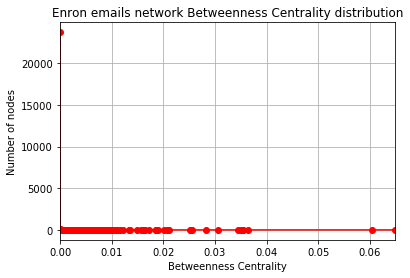

CPU times: user 8.84 s, sys: 260 ms, total: 9.1 s
Wall time: 8.72 s


In [8]:
%%time
print "Average betweenness centrality for enron email network=",mean(bt.values())
for k in g1.nodes():
    g1.node[k]['bcen'] = bt[k]
bcen_values = sorted(set(bt.values()))
bcen_hist = [bt.values().count(x) for x in bcen_values]
plt.figure()
plt.grid(True)
plt.plot(bcen_values, bcen_hist, 'ro-')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Number of nodes')
plt.title('Enron emails network Betweenness Centrality distribution')
plt.xlim([0, max(bt.values())])
plt.show()
plt.close()

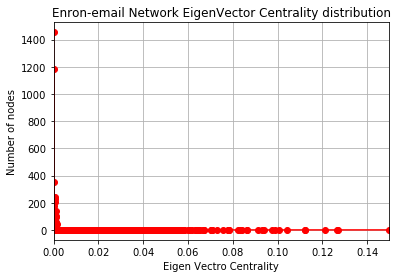

Average Eigen vector centrality= 0.00144747087879
Writing 'ecen' (dict) to file 'Results/enron/eigenCen.txt'.
CPU times: user 47.8 s, sys: 448 ms, total: 48.2 s
Wall time: 47.5 s


In [9]:
%%time
#Eigen Vector centrality distribution for whole network

ecen=nx.eigenvector_centrality(og)
ecen_values = sorted(set(ecen.values()))
ecen_hist = [ecen.values().count(x) for x in ecen_values]
plt.figure()
plt.grid(True)
plt.plot(ecen_values, ecen_hist,'ro-')
plt.xlabel('Eigen Vectro Centrality')
plt.ylabel('Number of nodes')
plt.title('Enron-email Network EigenVector Centrality distribution')
plt.xlim([0, max(ecen.values())])
plt.show()
plt.close()
print "Average Eigen vector centrality=",mean(ecen.values())
%store ecen >Results/enron/eigenCen.txt

## 'citNet'- Citation network analysis

In [4]:
%%time
# download the network file
import urllib
urllib.urlretrieve("http://snap.stanford.edu/data/cit-HepTh.txt.gz", "data/cit-HepTh.txt.gz")
urllib.urlretrieve("http://snap.stanford.edu/data/cit-HepTh-dates.txt.gz", "data/cit-HepTh-dates.txt.gz")
urllib.urlretrieve("http://snap.stanford.edu/data/cit-HepTh-abstracts.tar.gz", "data/cit-HepTh-abstracts.tar.gz")

# uncompress .txt.gz to .txt
import gzip
inF = gzip.GzipFile("data/cit-HepTh.txt.gz", 'rb')
s = inF.read()
inF.close()

outF = file("data/cit-HepTh.txt", 'wb')
outF.write(s)
outF.close()

# uncompress cit-HepTh-abstracts.tar.gz
import tarfile
tarfile.open("data/cit-HepTh-abstracts.tar.gz").extractall("data/cit-HepTh-abstracts")

CPU times: user 13 s, sys: 6.74 s, total: 19.7 s
Wall time: 12min 37s


In [3]:
%%time
# load the network
file_name = "data/cit-HepTh.txt"
# it's a directed graph, so we should use nx.DiGraph to read
g1 = nx.read_edgelist(file_name, create_using=nx.DiGraph(), nodetype=int)
print nx.info(g1)

Name: 
Type: DiGraph
Number of nodes: 27770
Number of edges: 352807
Average in degree:  12.7046
Average out degree:  12.7046
CPU times: user 2.5 s, sys: 92 ms, total: 2.59 s
Wall time: 2.57 s


In [4]:
%%time
from multiprocessing import Pool
import time
import itertools

G=g1

def chunks(l, n):
    """Divide a list of nodes `l` in `n` chunks"""
    l_c = iter(l)
    while 1:
        x = tuple(itertools.islice(l_c, n))
        if not x:
            return
        yield x


def _betmap(G_normalized_weight_sources_tuple):
    """Pool for multiprocess only accepts functions with one argument.
    This function uses a tuple as its only argument. We use a named tuple for
    python 3 compatibility, and then unpack it when we send it to
    `betweenness_centrality_source`
    """
    return nx.betweenness_centrality_subset(*G_normalized_weight_sources_tuple)


def betweenness_centrality_parallel(G, processes=4):
    """Parallel betweenness centrality  function"""
    p = Pool(processes=processes)
    node_divisor = len(p._pool)*4
    node_chunks = list(chunks(G.nodes(), int(G.order()/node_divisor)))
    #print node_chunks
    num_chunks = len(node_chunks)

    
    bt_sc = p.map(_betmap,
                  zip([G]*num_chunks,
                      node_chunks,
                      [list(G)]*num_chunks,
                      [True]*num_chunks,
                      [None]*num_chunks))
    
    
    #print bt_sc

    # Reduce the partial solutions
    bt_c = bt_sc[0]
    for bt in bt_sc[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

print("")
print("Computing betweenness centrality for:")
print(nx.info(G))
print("\tParallel version")
start = time.time()
#G = graph_max
#node_chunks = list(chunks(G.nodes(), int(G.order()/4)))
#G = graph_max
#print "SOURCE:", nx.betweenness_centrality_source(graph_max,True,False,list([1,2]))
#bt = nx.betweenness_centrality_subset(G,[0],list(G),True,None)
bt = betweenness_centrality_parallel(G)
#bt = nx.betweenness_centrality(graph_max)
print("\t\tTime: %.4F" % (time.time()-start))
print("\t\tBetweenness centrality for node 0: %.5f" % (bt[0]))

#print("\tNon-Parallel version")
#start = time.time()
#bt = nx.betweenness_centrality(G)
#print("\t\tTime: %.4F seconds" % (time.time()-start))
#print("\t\tBetweenness centrality for node 0: %.5f" % (bt[0]))

print("")

%store bt >Results/citation/betCen.txt


Computing betweenness centrality for:
Name: 
Type: DiGraph
Number of nodes: 27770
Number of edges: 352807
Average in degree:  12.7046
Average out degree:  12.7046
	Parallel version
		Time: 1424.9414


KeyError: 0

In [ ]:
# degrees of nodes, degree = in_degree + out_degree
deg = g1.degree()
deg_in = g1.in_degree()
deg_out = g1.out_degree()
# average degree
avg_deg = mean(deg.values())
avg_deg_in = mean(deg_in.values())
avg_deg_out = mean(deg_out.values())
# sorted nodes by degrees in descending order
degree_sequence_in = sorted(deg_in.values(), reverse=True)
degree_sequence_out = sorted(deg_out.values(), reverse=True)
# get the degree distribution
import collections
degree_count_in = collections.Counter(degree_sequence_in)
degree_count_out = collections.Counter(degree_sequence_out)
deg_in, cnt_in = zip(*degree_count_in.items())
deg_out, cnt_out = zip(*degree_count_out.items())
# degree distribution
plt.loglog(deg_in, cnt_in, label="in_degree", linestyle='None', marker='o', markeredgecolor='b', markerfacecolor='w')
plt.loglog(deg_out, cnt_out, label="out_degree", linestyle='None', marker='o', markeredgecolor='r', markerfacecolor='w')
legend(fontsize='medium')
plt.title("Degree Distribution")
plt.ylabel("number")
plt.xlabel("degree")

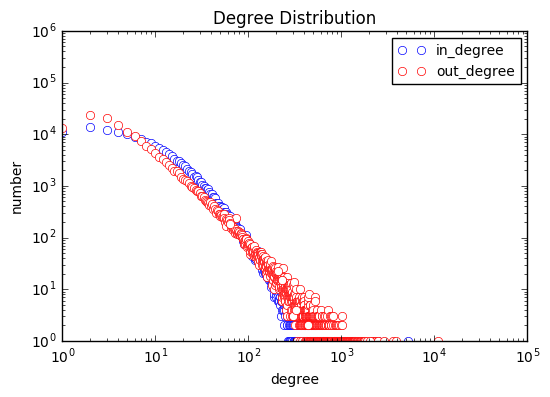

In [4]:
%%time
# check whether the network is connected, if not find the largest connected component of the network
og=g1
g=g1.to_undirected()
connected=nx.is_connected(g)

if connected is True:
    print "Graph is connected!"
    graph_max=g1
else:
    print "Graph is not connected. So, finding the largest connected component of graph"
    print "Properties of largest subgraph:"
    graphs = list(nx.connected_component_subgraphs(g, copy=True))
    # the connected component with the most nodes
    graph_max = sorted([(len(gn.nodes()), gn) for gn in graphs], key=lambda x: x[0], reverse=True)[0][1]
    print nx.info(graph_max)
g1=graph_max

Graph is not connected. So, finding the largest connected component of graph
Properties of largest subgraph:
Name: 
Type: Graph
Number of nodes: 27400
Number of edges: 352059
Average degree:  25.6977
CPU times: user 11.1 s, sys: 248 ms, total: 11.3 s
Wall time: 11.2 s


In [ ]:
%%time
#average shortest path length of Largest connected component
aspl=nx.average_shortest_path_length(g1)
print "Average Shortest path length=",aspl
%store aspl >Results/citation/aspl.txt

Average Shortest path length= 4.27868008396
Writing 'aspl' (float) to file 'Results/citation/aspl.txt'.
CPU times: user 2h 53min 9s, sys: 59.1 s, total: 2h 54min 8s
Wall time: 2h 51min 39s


In [ ]:
%%time
diameter=nx.diameter(g1)
print "Network diameter=",diameter
%store diameter >Results/citation/diameter.txt

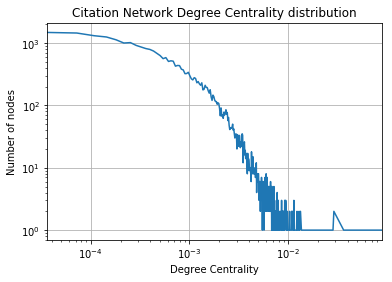

Average degree centrality= 0.000915021015564
Writing 'dc' (dict) to file 'Results/citation/degCen.txt'.
CPU times: user 2.02 s, sys: 432 ms, total: 2.45 s
Wall time: 2.08 s


In [32]:
%%time
#degree centrality distribution and parsing into Gephi

dc=nx.degree_centrality(og)
for k in og.nodes():
    og.node[k]['dc'] = dc[k]
dc_values = sorted(set(dc.values()))
dc_hist = [dc.values().count(x) for x in dc_values]
plt.figure()
plt.grid(True)
plt.loglog(dc_values, dc_hist)
plt.xlabel('Degree Centrality')
plt.ylabel('Number of nodes')
plt.title('Citation Network Degree Centrality distribution')
plt.xlim([0, max(dc.values())])
plt.show()
plt.close()
print "Average degree centrality=",mean(dc.values())
%store dc >Results/citation/degCen.txt

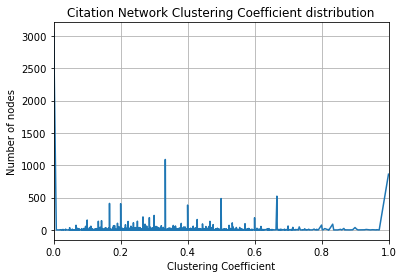

Average Clusterng Coefficient= 0.312019495806
Writing 'cc' (dict) to file 'Results/citation/clCoeff.txt'.
CPU times: user 21.1 s, sys: 368 ms, total: 21.5 s
Wall time: 21.1 s


In [34]:
%%time
#clustering coefficient

cc=nx.clustering(g)
cc_values = sorted(set(cc.values()))
cc_hist = [cc.values().count(x) for x in cc_values]
plt.figure()
plt.grid(True)
plt.plot(cc_values, cc_hist)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of nodes')
plt.title('Citation Network Clustering Coefficient distribution')
plt.xlim([0, 1])
plt.show()
plt.close()
print "Average Clusterng Coefficient=",mean(cc.values())
%store cc >Results/citation/clCoeff.txt

In [ ]:
%%time
#Betweenness centrality distribution and parsing into Gephi

bcen=nx.betweenness_centrality(og)
for k in og.nodes():
    og.node[k]['bcen'] = bcen[k]
bcen_values = sorted(set(bcen.values()))
bcen_hist = [bcen.values().count(x) for x in bcen_values]
plt.figure()
plt.grid(True)
plt.plot(bcen_values, bcen_hist, 'ro-')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Number of nodes')
plt.title('Citation network Betweenness Centrality distribution')
plt.xlim([0, max(bcen.values())])
plt.show()
plt.close()
print "Average betweenness centrality=",mean(bcen.values())
%store bcen >Results/citation/betCen.txt

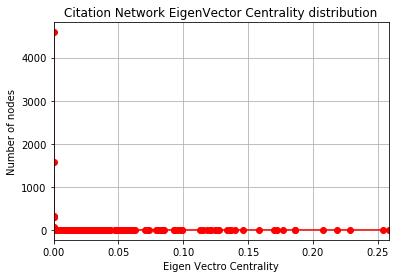

Average Eigen vector centrality= 0.000509461622132
Writing 'ecen' (dict) to file 'Results/citation/eigenCen.txt'.
CPU times: user 1min, sys: 456 ms, total: 1min 1s
Wall time: 1min


In [5]:
%%time
#Eigen Vector centrality distribution for whole network

ecen=nx.eigenvector_centrality(og)
ecen_values = sorted(set(ecen.values()))
ecen_hist = [ecen.values().count(x) for x in ecen_values]
plt.figure()
plt.grid(True)
plt.plot(ecen_values, ecen_hist,'ro-')
plt.xlabel('Eigen Vectro Centrality')
plt.ylabel('Number of nodes')
plt.title('Citation Network EigenVector Centrality distribution')
plt.xlim([0, max(ecen.values())])
plt.show()
plt.close()
print "Average Eigen vector centrality=",mean(ecen.values())
%store ecen >Results/citation/eigenCen.txt

## Erdos Network- Collaboration Network analysis

In [9]:
%%time
# build Collaboration Network
# undirected network
g1 = nx.Graph()

# add Paul Erdos into our network at first
dict_authors = {}
dict_authors['Paul Erdos'] = 0
g1.add_node(0)
g1.node[0]['author'] = 'Paul Erdos'

# add the authors with Erdos number 1 and 2 from file
line_count = 1
skip_line = 24
skip_space = 1

is_new = False
author = ""
coauthor = ""
index = 1
ind_author = 1
ind_coauthor = 1

def parseLine(l, start):
    end = start
    while end < len(l) - 1 and not (l[end] == ' ' and l[end + 1] == ' '):
        end += 1
    return l[start:end]

def addAuthor(auth, ind):
    if auth in dict_authors:
        return ind
    dict_authors[auth] = ind
    return ind + 1

for l in open("data/Erdos1.html"):    
    if line_count >= skip_line:
        if l == '\n':
            is_new = True
        elif is_new:
            author = parseLine(l, 0)
            index = addAuthor(author, index)
            ind_author = dict_authors[author]
            g1.add_edge(0, ind_author)
            g1.node[ind_author]['author'] = author
            is_new = False
        elif l == '</pre>':
            break
        else:
            coauthor = parseLine(l, skip_space)
            index = addAuthor(coauthor, index)
            ind_coauthor = dict_authors[coauthor]
            g1.add_edge(ind_author, ind_coauthor)
            g1.node[ind_coauthor]['author'] = coauthor
    line_count += 1

print nx.info(g1)

Name: 
Type: Graph
Number of nodes: 11524
Number of edges: 18504
Average degree:   3.2114
CPU times: user 156 ms, sys: 4 ms, total: 160 ms
Wall time: 165 ms


In [10]:
%%time
# check whether the network is connected, if not find the largest connected component of the network
connected=nx.is_connected(g1)
og=g1

if connected is True:
    print "Graph is connected!"
    graph_max=g1
else:
    print "Graph is not connected. So, finding the largest connected component of graph"
    print "Properties of largest subgraph:"
    graphs = list(nx.connected_component_subgraphs(g1, copy=True))
    # the connected component with the most nodes
    graph_max = sorted([(len(gn.nodes()), gn) for gn in graphs], key=lambda x: x[0], reverse=True)[0][1]
    print nx.info(graph_max)
g1=graph_max

Graph is connected!
CPU times: user 32 ms, sys: 16 ms, total: 48 ms
Wall time: 29.5 ms


In [11]:
%%time
#average shortest path length of Largest connected component
aspl=nx.average_shortest_path_length(g1)
print "Average Shortest path length=",aspl
%store aspl >Results/erdos/aspl.txt

Average Shortest path length= 3.82198743331
Writing 'aspl' (float) to file 'Results/erdos/aspl.txt'.
CPU times: user 32min 8s, sys: 29.8 s, total: 32min 38s
Wall time: 32min 10s


In [12]:
%%time
diameter=nx.diameter(g1)
print "Network diameter=",diameter
%store diameter >Results/erdos/diameter.txt

Network diameter= 4
Writing 'diameter' (int) to file 'Results/erdos/diameter.txt'.
CPU times: user 33min 31s, sys: 39.5 s, total: 34min 10s
Wall time: 33min 31s


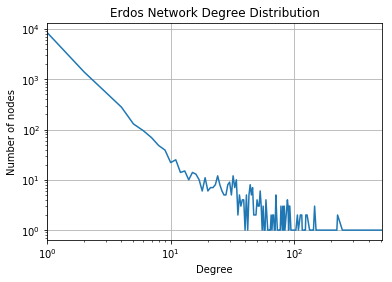

Writing 'deg' (DegreeView) to file 'Results/erdos/degDist.txt'.
Average degree= 3.21138493579
CPU times: user 3.64 s, sys: 344 ms, total: 3.99 s
Wall time: 3.54 s


In [15]:
%%time
node=og.order()
deg=og.degree()
d=list(np.zeros((node), dtype=np.int))
temp=list(np.zeros((node), dtype=np.int))
for k in range (node):
    d[k]= deg[k]
for k in range (node):
    temp[k]=k
degList=dict(zip(temp,d))
for k in g1.nodes():
    og.node[k]['deg'] = deg[k]
deg_values = sorted(set(degList.values()))
deg_hist = [degList.values().count(x) for x in deg_values]
plt.figure()
plt.grid(True)
plt.loglog(deg_values, deg_hist) #degree
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Erdos Network Degree Distribution')
plt.xlim([0, max(degList.values())])
plt.show()
plt.close()
%store deg >Results/erdos/degDist.txt
print "Average degree=",mean(degList.values())

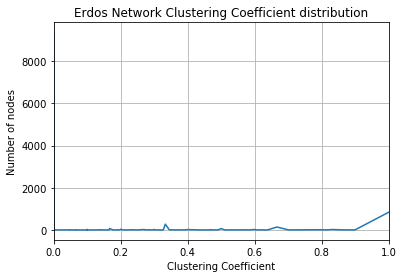

Average Clusterng Coefficient= 0.105869608197
Writing 'cc' (dict) to file 'Results/erdos/clCoeff.txt'.
CPU times: user 3.98 s, sys: 428 ms, total: 4.41 s
Wall time: 3.95 s


In [16]:
%%time
#clustering coefficient

cc=nx.clustering(g1)
cc_values = sorted(set(cc.values()))
cc_hist = [cc.values().count(x) for x in cc_values]
plt.figure()
plt.grid(True)
plt.plot(cc_values, cc_hist)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of nodes')
plt.title('Erdos Network Clustering Coefficient distribution')
plt.xlim([0, 1])
plt.show()
plt.close()
print "Average Clusterng Coefficient=",mean(cc.values())
%store cc >Results/erdos/clCoeff.txt

In [19]:
%%time
from multiprocessing import Pool
import time
import itertools

G=g1

def chunks(l, n):
    """Divide a list of nodes `l` in `n` chunks"""
    l_c = iter(l)
    while 1:
        x = tuple(itertools.islice(l_c, n))
        if not x:
            return
        yield x


def _betmap(G_normalized_weight_sources_tuple):
    """Pool for multiprocess only accepts functions with one argument.
    This function uses a tuple as its only argument. We use a named tuple for
    python 3 compatibility, and then unpack it when we send it to
    `betweenness_centrality_source`
    """
    return nx.betweenness_centrality_subset(*G_normalized_weight_sources_tuple)


def betweenness_centrality_parallel(G, processes=4):
    """Parallel betweenness centrality  function"""
    p = Pool(processes=processes)
    node_divisor = len(p._pool)*4
    node_chunks = list(chunks(G.nodes(), int(G.order()/node_divisor)))
    #print node_chunks
    num_chunks = len(node_chunks)

    
    bt_sc = p.map(_betmap,
                  zip([G]*num_chunks,
                      node_chunks,
                      [list(G)]*num_chunks,
                      [True]*num_chunks,
                      [None]*num_chunks))
    
    
    #print bt_sc

    # Reduce the partial solutions
    bt_c = bt_sc[0]
    for bt in bt_sc[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

print("")
print("Computing betweenness centrality for:")
print(nx.info(G))
print("\tParallel version")
start = time.time()
#G = graph_max
#node_chunks = list(chunks(G.nodes(), int(G.order()/4)))
#G = graph_max
#print "SOURCE:", nx.betweenness_centrality_source(graph_max,True,False,list([1,2]))
#bt = nx.betweenness_centrality_subset(G,[0],list(G),True,None)
bt = betweenness_centrality_parallel(G)
#bt = nx.betweenness_centrality(graph_max)
print("\t\tTime: %.4F" % (time.time()-start))
print("\t\tBetweenness centrality for node 0: %.5f" % (bt[0]))

#print("\tNon-Parallel version")
#start = time.time()
#bt = nx.betweenness_centrality(G)
#print("\t\tTime: %.4F seconds" % (time.time()-start))
#print("\t\tBetweenness centrality for node 0: %.5f" % (bt[0]))

print("")
%store bt >Results/erdos/betCen.txt


Computing betweenness centrality for:
Name: 
Type: Graph
Number of nodes: 11524
Number of edges: 18504
Average degree:   3.2114
	Parallel version
		Time: 313.6758
		Betweenness centrality for node 0: 0.75593

Writing 'bt' (dict) to file 'Results/erdos/betCen.txt'.
CPU times: user 2.13 s, sys: 0 ns, total: 2.13 s
Wall time: 5min 13s


In [21]:
print "Average betweenness centrality for erdos network=",mean(bt.values())

Average betweenness centrality for erdos network= 0.000244921665797


### Repeat the above parts for all the other three networks.

## Task 2
### In this task we will use Gephi to visualize the networks that you analyzed. In the previous task, you saved the graph in the graphml format such that each node has the degree and its betweenness centrality as its attribute. In this task you are going to use these attributes to have a better visualization of the graph. Follow these steps to find a nice and meaningfull visualization of the graphs:

### Open Gephi-->> Open the '.gml' file of a network -->> Change 'Layout' of the graph to Force Atlas 2, etc. to have a better visualisation -->> In 'Appearance' window there are multiple options to change appearance of the nodes/ edges of the graph according to the various network properties like degree, clustering coefficient, modularity class, etc.-->> Change node size according to Degree distribution. -->> Save image file and include it in the following cell for each of the above networks.

### Respond to following questions for Facebook and Enron-email dataset only.
#### 1) Visualize network using Gephi using suitable layout, with node size as well as node label / Id proportional to the degree distribution of each node. Use 3 different colors to differentiate nodes with high, moderate and low degree distribution.
#### 2) Repeat (1) with node size as well as node label / Id proportional to the betweenness centrality.
#### 3) Analyze all the graphs and explain which of the nodes according to you are the most important node, as far as network structure is concerned. Why?